# Load books and descriptions into python

In [48]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

from sklearn.cluster import KMeans

In [3]:
directory="goodreads-data/books"
books = {}

In [4]:
for filename in os.listdir(directory):
    if filename.endswith('.json'):  # Check if the file is a JSON file
        filepath = os.path.join(directory, filename)
        
        # Open and read the JSON file
        with open(filepath, 'r') as file:
            try:
                data = json.load(file)  # Load the JSON data
                print(f"Contents of {filename}:")
                print(data)
                books[data['book_title']] = data['book_description']

            except json.JSONDecodeError as e:
                print(f"Error reading {filename}: {e}")

Contents of 61439040-1984.json:
{'book_id_title': '61439040-1984', 'book_id': '61439040', 'book_title': '1984', 'book_description': "A masterpiece of rebellion and imprisonment where war is peace freedom is slavery and Big Brother is watching. Thought Police, Big Brother, Orwellian - these words have entered our vocabulary because of George Orwell's classic dystopian novel 1984. The story of one man's Nightmare Odyssey as he pursues a forbidden love affair through a world ruled by warring states and a power structure that controls not only information but also individual thought and memory 1984 is a prophetic haunting tale More relevant than ever before 1984 exposes the worst crimes imaginable the destruction of truth freedom and individuality. With a foreword by Thomas Pynchon. This beautiful paperback edition features deckled edges and french flaps a perfect gift for any occasionAlternate cover edition can be found here.", 'book_url': 'https://www.goodreads.com/book/show/61439040-198

## Sucessfully loaded book titles and descriptions

In [5]:
len(books)

105

# Tokenize descriptions

In [6]:
import spacy

# Load the SpaCy English model
nlp = spacy.load('en_core_web_sm')


In [7]:
# Function to process descriptions
def process_description(description):
    
    # Process the text
    doc = nlp(description)
        
    # Extract lemmas of non-stop words
    lemmas = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    
    return lemmas

In [8]:
tokenized_descriptions = {}
for i in books:
    tokenized_descriptions[i] = process_description(books[i])

tokenized_descriptions.values()
    

dict_values([['masterpiece', 'rebellion', 'imprisonment', 'war', 'peace', 'freedom', 'slavery', 'Big', 'Brother', 'watch', 'Thought', 'Police', 'Big', 'Brother', 'Orwellian', 'word', 'enter', 'vocabulary', 'George', 'Orwell', 'classic', 'dystopian', 'novel', 'story', 'man', 'Nightmare', 'Odyssey', 'pursue', 'forbidden', 'love', 'affair', 'world', 'rule', 'war', 'state', 'power', 'structure', 'control', 'information', 'individual', 'thought', 'memory', 'prophetic', 'haunt', 'tale', 'relevant', 'expose', 'bad', 'crime', 'imaginable', 'destruction', 'truth', 'freedom', 'individuality', 'foreword', 'Thomas', 'Pynchon', 'beautiful', 'paperback', 'edition', 'feature', 'deckle', 'edge', 'french', 'flap', 'perfect', 'gift', 'occasionalternate', 'cover', 'edition', 'find'], ['book', 'Magnificent', 'Dune', 'Chronicles', 'Bestselling', 'Science', 'Fiction', 'Adventure', 'TimeDune', 'Messiah', 'continue', 'story', 'Paul', 'Atreides', 'well', 'know', 'fear', 'man', 'christen', 'Emperor', 'Known', '

In [9]:
descriptions = tokenized_descriptions

# Convert the dictionary into a format compatible with TfidfVectorizer
titles = list(descriptions.keys())
descriptions_as_strings = [' '.join(lemmas) for lemmas in descriptions.values()]

def vectorize_text(description):
    """Return a Tf-Idf sparse matrix """
    # Initialize the TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Compute TF-IDF scores
    tfidf_matrix = vectorizer.fit_transform(description)

    # Get feature names (unique terms)
    terms = vectorizer.get_feature_names_out()
    return tfidf_matrix.todense(), terms

tfidf_dense, terms = vectorize_text(descriptions_as_strings)

# Process each description
top_words_per_description = []
for i, desc_scores in enumerate(tfidf_dense):
    # Create a dictionary of term:score pairs
    term_scores = {term: score for term, score in zip(terms, desc_scores.tolist()[0])}
    
    # Get the top 15 terms sorted by TF-IDF score
    top_terms = sorted(term_scores.items(), key=lambda x: x[1], reverse=True)[:15]
    
    # Store the title and top terms
    top_words_per_description.append({
        "title": titles[i],
        "top_words": top_terms
    })

# Display the results
for book in top_words_per_description:
    print(f"Title: {book['title']}")
    print("Top 15 TF-IDF Words:")
    for word, score in book["top_words"]:
        print(f"  {word}: {score:.4f}")
    print()

Title: 1984
Top 15 TF-IDF Words:
  freedom: 0.2393
  thought: 0.2393
  brother: 0.2125
  big: 0.2030
  edition: 0.1624
  war: 0.1624
  affair: 0.1303
  deckle: 0.1303
  dystopian: 0.1303
  forbidden: 0.1303
  foreword: 0.1303
  french: 0.1303
  imprisonment: 0.1303
  individuality: 0.1303
  occasionalternate: 0.1303

Title: Dune Messiah
Top 15 TF-IDF Words:
  paul: 0.3411
  atreides: 0.2274
  house: 0.1831
  assume: 0.1394
  bestselling: 0.1394
  chani: 0.1394
  christen: 0.1394
  conduct: 0.1394
  conspiracy: 0.1394
  crumble: 0.1394
  enmity: 0.1394
  fremens: 0.1394
  icon: 0.1394
  known: 0.1394
  lover: 0.1394

Title: Spider-Man: Blue
Top 15 TF-IDF Words:
  fall: 0.2390
  love: 0.2390
  stacy: 0.2357
  spider: 0.2261
  gwen: 0.2165
  man: 0.2055
  rest: 0.2028
  life: 0.1999
  spend: 0.1922
  parker: 0.1644
  peter: 0.1594
  story: 0.1199
  appropriately: 0.1178
  daredevil: 0.1178
  eisner: 0.1178

Title: The Lightning Thief
Top 15 TF-IDF Words:
  percy: 0.3684
  camp: 0.2198
  d

# Write Found keywords to csv

In [10]:
final_write = []

for i in top_words_per_description:
    for j in i['top_words']:
        final_write.append([i['title'], j[0], j[1]])
        
df = pd.DataFrame(final_write, columns=['Title', 'Word', 'Score'])
df.to_csv('top_keywords.csv', index=False)

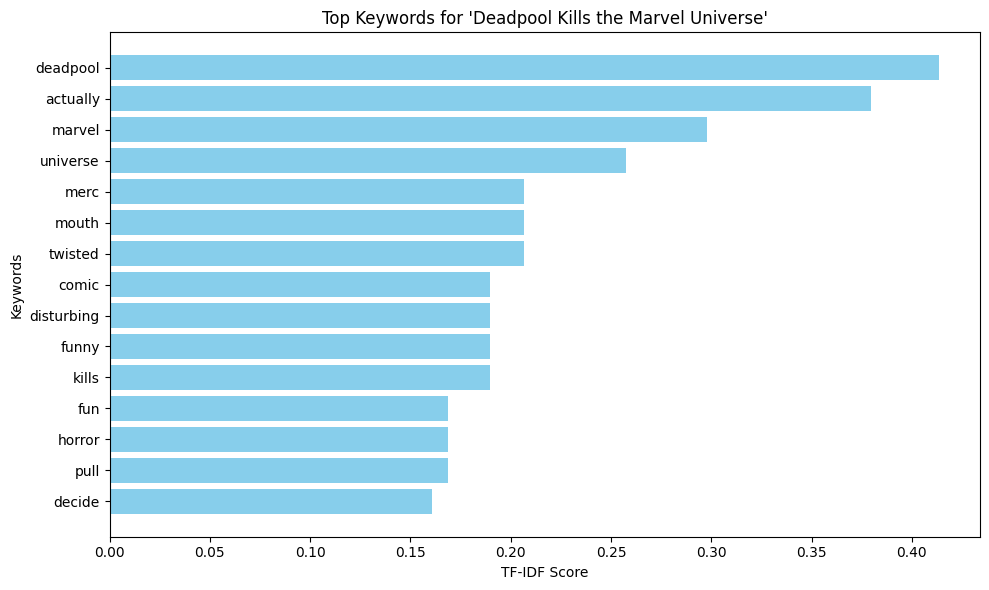

In [11]:
# Visualization
title = np.random.choice(df['Title'].unique().tolist())

def plot_book(title, df):
    """Given a book title, plot tf idf graph"""
    # Filter the top keywords for the current book
    book_keywords = df[df["Title"] == title]

    # Plot the keywords
    plt.figure(figsize=(10, 6))
    plt.barh(book_keywords["Word"], book_keywords["Score"], color="skyblue")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Keywords")
    plt.title(f"Top Keywords for '{title}'")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()
    plt.show()

plot_book(title, df)

TF IDF Heatmap

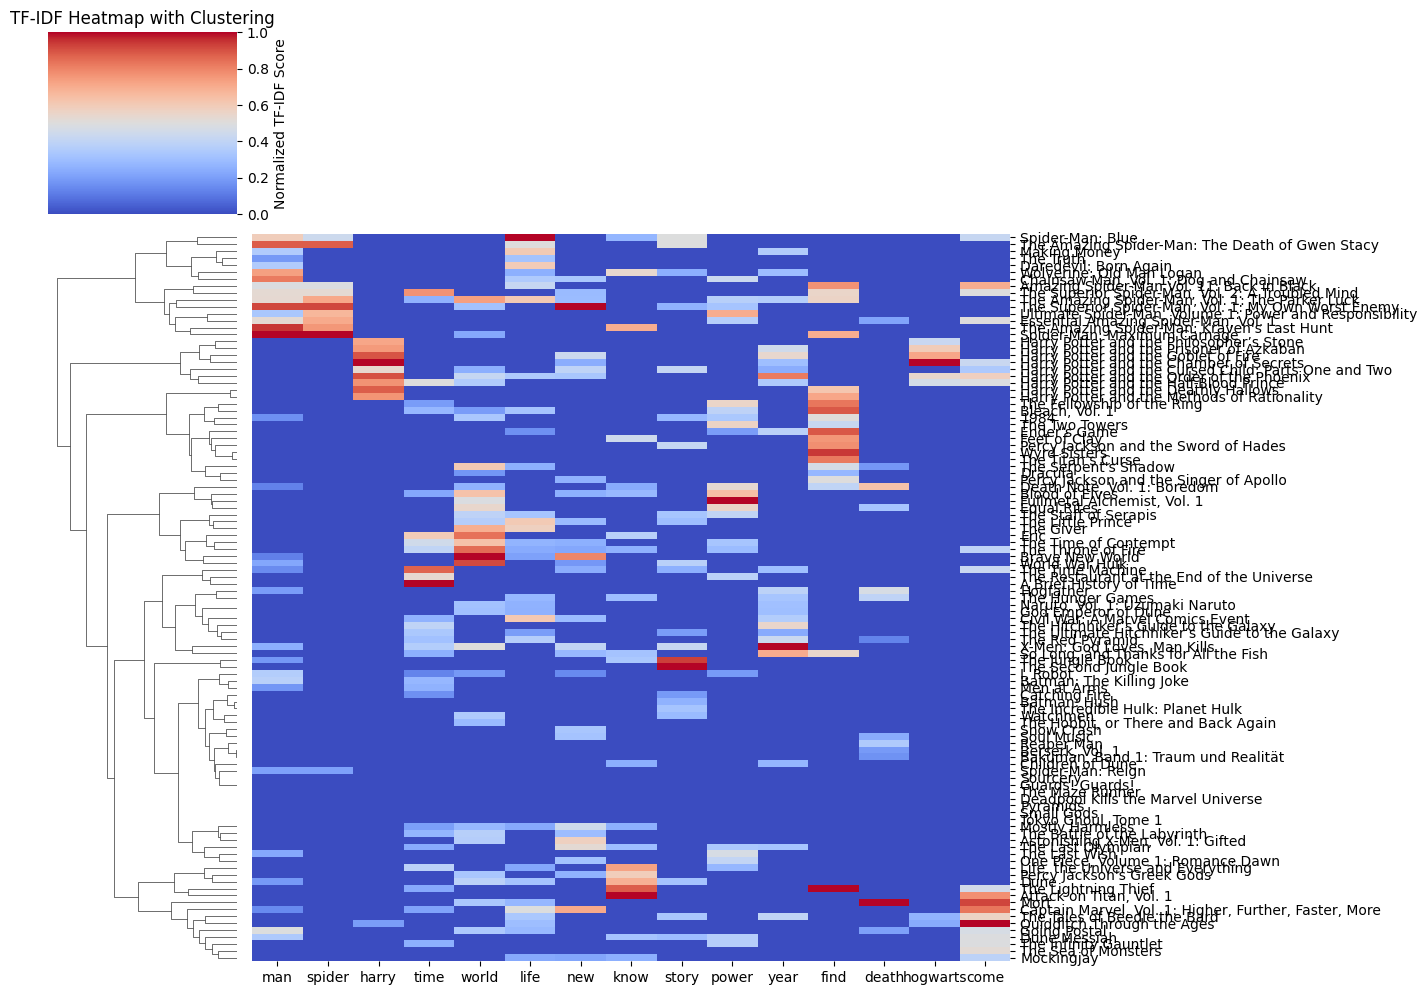

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# Example dictionary with titles as keys and lemmatized descriptions as values
descriptions = tokenized_descriptions

# Convert the dictionary into a format compatible with TfidfVectorizer
titles = list(descriptions.keys())
descriptions_as_strings = [' '.join(lemmas) for lemmas in descriptions.values()]

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF scores
tfidf_matrix = vectorizer.fit_transform(descriptions_as_strings)

# Get feature names (unique terms)
terms = vectorizer.get_feature_names_out()

# Create a DataFrame for TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=titles, columns=terms)

# Normalize TF-IDF scores for better color contrast
scaler = MinMaxScaler()
tfidf_normalized = pd.DataFrame(scaler.fit_transform(tfidf_df), index=titles, columns=terms)

# Select the top 15 keywords based on average TF-IDF score across all books
top_n_keywords = 15
top_keywords = tfidf_df.mean(axis=0).sort_values(ascending=False).head(top_n_keywords).index
tfidf_top = tfidf_normalized[top_keywords]

# Perform hierarchical clustering on books for better visualization
row_linkage = linkage(tfidf_top, method="ward")
sns.clustermap(
    tfidf_top,
    row_cluster=True,
    col_cluster=False,
    row_linkage=row_linkage,
    figsize=(14, 10),
    cmap="coolwarm",
    cbar_kws={'label': 'Normalized TF-IDF Score'},
    xticklabels=True,
    yticklabels=True
)

plt.title("TF-IDF Heatmap with Clustering")
plt.tight_layout()
plt.show()


In [13]:
import plotly.express as px
import nbformat
# Convert TF-IDF data to long format for Plotly
tfidf_long = tfidf_top.reset_index().melt(id_vars="index", var_name="Keyword", value_name="TF-IDF Score")

# Create an interactive heatmap
fig = px.imshow(
    tfidf_top,
    labels={"x": "Keyword", "y": "Book", "color": "Normalized TF-IDF"},
    x=top_keywords,
    y=titles,
    color_continuous_scale="Viridis"
)

fig.update_layout(
    title="TF-IDF Heatmap",
    xaxis={"tickangle": 45},
    height=800,
    width=1200
)
fig.show()


In [14]:
tokenized_descriptions

{'1984': ['masterpiece',
  'rebellion',
  'imprisonment',
  'war',
  'peace',
  'freedom',
  'slavery',
  'Big',
  'Brother',
  'watch',
  'Thought',
  'Police',
  'Big',
  'Brother',
  'Orwellian',
  'word',
  'enter',
  'vocabulary',
  'George',
  'Orwell',
  'classic',
  'dystopian',
  'novel',
  'story',
  'man',
  'Nightmare',
  'Odyssey',
  'pursue',
  'forbidden',
  'love',
  'affair',
  'world',
  'rule',
  'war',
  'state',
  'power',
  'structure',
  'control',
  'information',
  'individual',
  'thought',
  'memory',
  'prophetic',
  'haunt',
  'tale',
  'relevant',
  'expose',
  'bad',
  'crime',
  'imaginable',
  'destruction',
  'truth',
  'freedom',
  'individuality',
  'foreword',
  'Thomas',
  'Pynchon',
  'beautiful',
  'paperback',
  'edition',
  'feature',
  'deckle',
  'edge',
  'french',
  'flap',
  'perfect',
  'gift',
  'occasionalternate',
  'cover',
  'edition',
  'find'],
 'Dune Messiah': ['book',
  'Magnificent',
  'Dune',
  'Chronicles',
  'Bestselling',
  

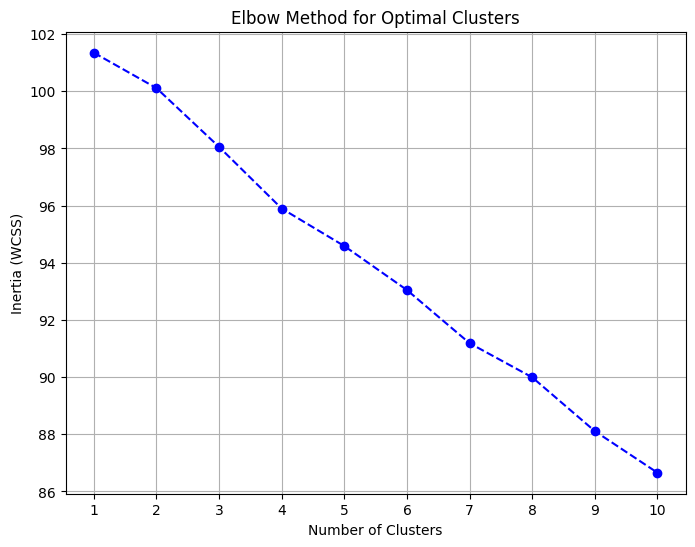

In [ ]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(1, 11)

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.xticks(cluster_range)
plt.grid()
plt.show()

                                 Title  Cluster
0                                 1984        0
1                         Dune Messiah        0
2                     Spider-Man: Blue        0
3                  The Lightning Thief        3
4                            The Truth        0
..                                 ...      ...
100                          The Giver        3
101                     The Two Towers        1
102                   The Hunger Games        3
103                         Mockingjay        3
104  One Piece, Volume 1: Romance Dawn        1

[105 rows x 2 columns]


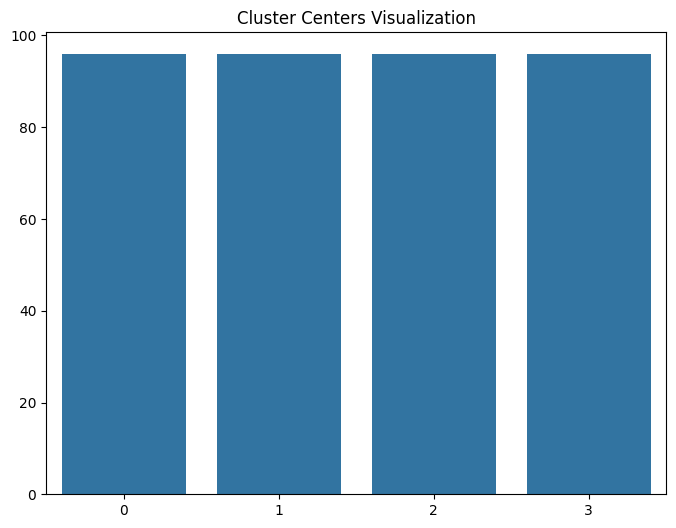

In [46]:

# Convert descriptions into TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')

descriptions_as_strings = [' '.join(lemmas) for lemmas in tokenized_descriptions.values()]
tfidf_matrix = vectorizer.fit_transform(descriptions_as_strings)

# Apply K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to each book
cluster_labels = kmeans.labels_

# Create a DataFrame with titles and cluster labels
books_df = pd.DataFrame({
    "Title": descriptions.keys(),
    "Cluster": cluster_labels
})

print(books_df)

# Visualize cluster centers
plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(num_clusters)), y=kmeans.inertia_)
plt.title("Cluster Centers Visualization")
plt.show()

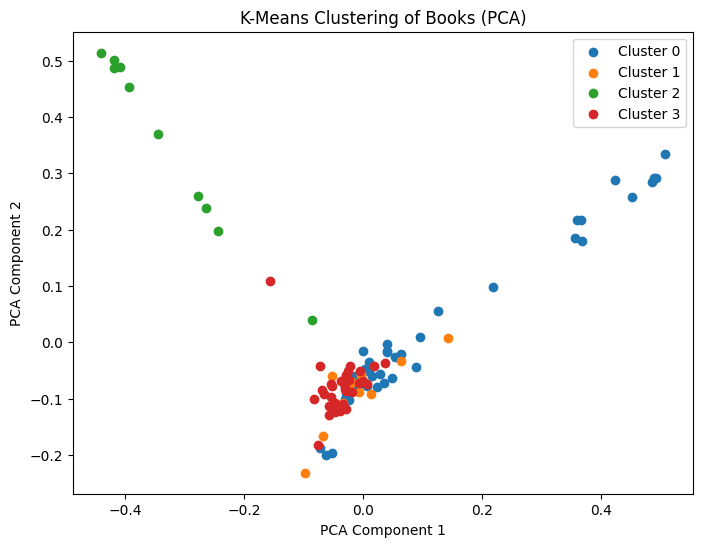

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce TF-IDF matrix to 2D using PCA
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    cluster_points = tfidf_2d[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

plt.title("K-Means Clustering of Books (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


In [42]:
books_df[books_df['Cluster'] == 0]['Title']

0                                                  1984
1                                          Dune Messiah
2                                      Spider-Man: Blue
4                                             The Truth
8                                     Spider-Man: Reign
11            Amazing Spider-Man Vol. 11: Back in Black
12                                           Small Gods
13                             Batman: The Killing Joke
14                 The Hitchhiker’s Guide to the Galaxy
16            The Restaurant at the End of the Universe
17                                Daredevil: Born Again
18                                           Snow Crash
20                                The Infinity Gauntlet
21                                             Watchmen
22                                 The Time of Contempt
24                                         Ender’s Game
25                       Naruto, Vol. 1: Uzumaki Naruto
35                                            Ho